<a href="https://colab.research.google.com/github/aditya-167/TradingBot/blob/main/Copy_of_CS435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle
import numpy as np
import pandas as pd
from pandas.core.window.expanding import Axis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
training_object = open("/content/drive/MyDrive/CS435/datasets/training_set.pkl", "rb")
training_df = pickle.load(training_object)
stock_df = training_df[0] #taking the first table in the array as of now.

In [4]:
stock_df['Close_pct_change'] = stock_df['Close'].pct_change()

In [5]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
0,0.672106,0.679902,0.669265,0.671966,0.336899,NaN
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555
...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885


In [6]:
stock_df = stock_df.dropna()

In [7]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555
5,0.675892,0.676115,0.673609,0.674890,0.205266,-0.001483
...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885


In [8]:
stock_df['Close_pct_change'].describe()

count    2201.000000
mean        0.000013
std         0.006096
min        -0.039071
25%        -0.002539
50%         0.000147
75%         0.002671
max         0.051286
Name: Close_pct_change, dtype: float64

### Close percentage change categories

In [9]:
bin_labels = ["decrease", "no big change", "increase"]
stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)
stock_df

<ipython-input-9-8fc8cac91a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
<ipython-input-9-8fc8cac91a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)


,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207,"(-0.00142, 0.00162]",no big change
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214,"(0.00162, 0.0513]",increase
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117,"(-0.040100000000000004, -0.00142]",decrease
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555,"(0.00162, 0.0513]",increase
5,0.675892,0.676115,0.673609,0.674890,0.205266,-0.001483,"(-0.040100000000000004, -0.00142]",decrease
...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease


### Range of the each close percentage categories

In [10]:
print("Ranges for the categories \n"+str(stock_df['Close_pct_change_range'].value_counts().keys()[0])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[1])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[2]))

Ranges for the categories 
(-0.040100000000000004, -0.00142]
(0.00162, 0.0513]
(-0.00142, 0.00162]


In [11]:
def addTI(df,lag=5):
  short_w = [5,8,13,26,44,50,75,100,150]
  long_w = [12,19,26,44,75,100,125,200,300]
  data = df.copy()
  features = []
  for x,y in zip(short_w,long_w):
    data["SMA_diff_"+str(x)+"_"+str(y)] = data.Close.rolling(x).mean() - data.Close.rolling(y).mean()
    features.append("SMA_diff_"+str(x)+"_"+str(y))
  for x in (short_w+long_w):
    data["Boll_"+str(x)] = (data.Close - data.Close.rolling(x).mean())/data.Close.rolling(x).std() 
    features.append("Boll_"+str(x))
    data["Min_"+str(x)] = data.Close.rolling(x).min()/data.Close -1 
    features.append("Min_"+str(x))
    data["Max_"+str(x)] =  data.Close.rolling(x).max()/data.Close -1  
    features.append("Max_"+str(x))
    data["Mom_"+str(x)] = data.Close_pct_change.rolling(x).mean()
    features.append("Mom_"+str(x))
    data["Vol_"+str(x)] = data.Close_pct_change.rolling(x).std()
    features.append("Vol_"+str(x))
  
  for f in features:
    col = "{}_lag_{}".format(f,lag)
    data[col] = data[f].shift(lag)

  data.dropna(inplace=True)
  return data

In [12]:
stock_df = addTI(stock_df,lag=21)

<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

<Axes: title={'center': 'Feature Plot'}>

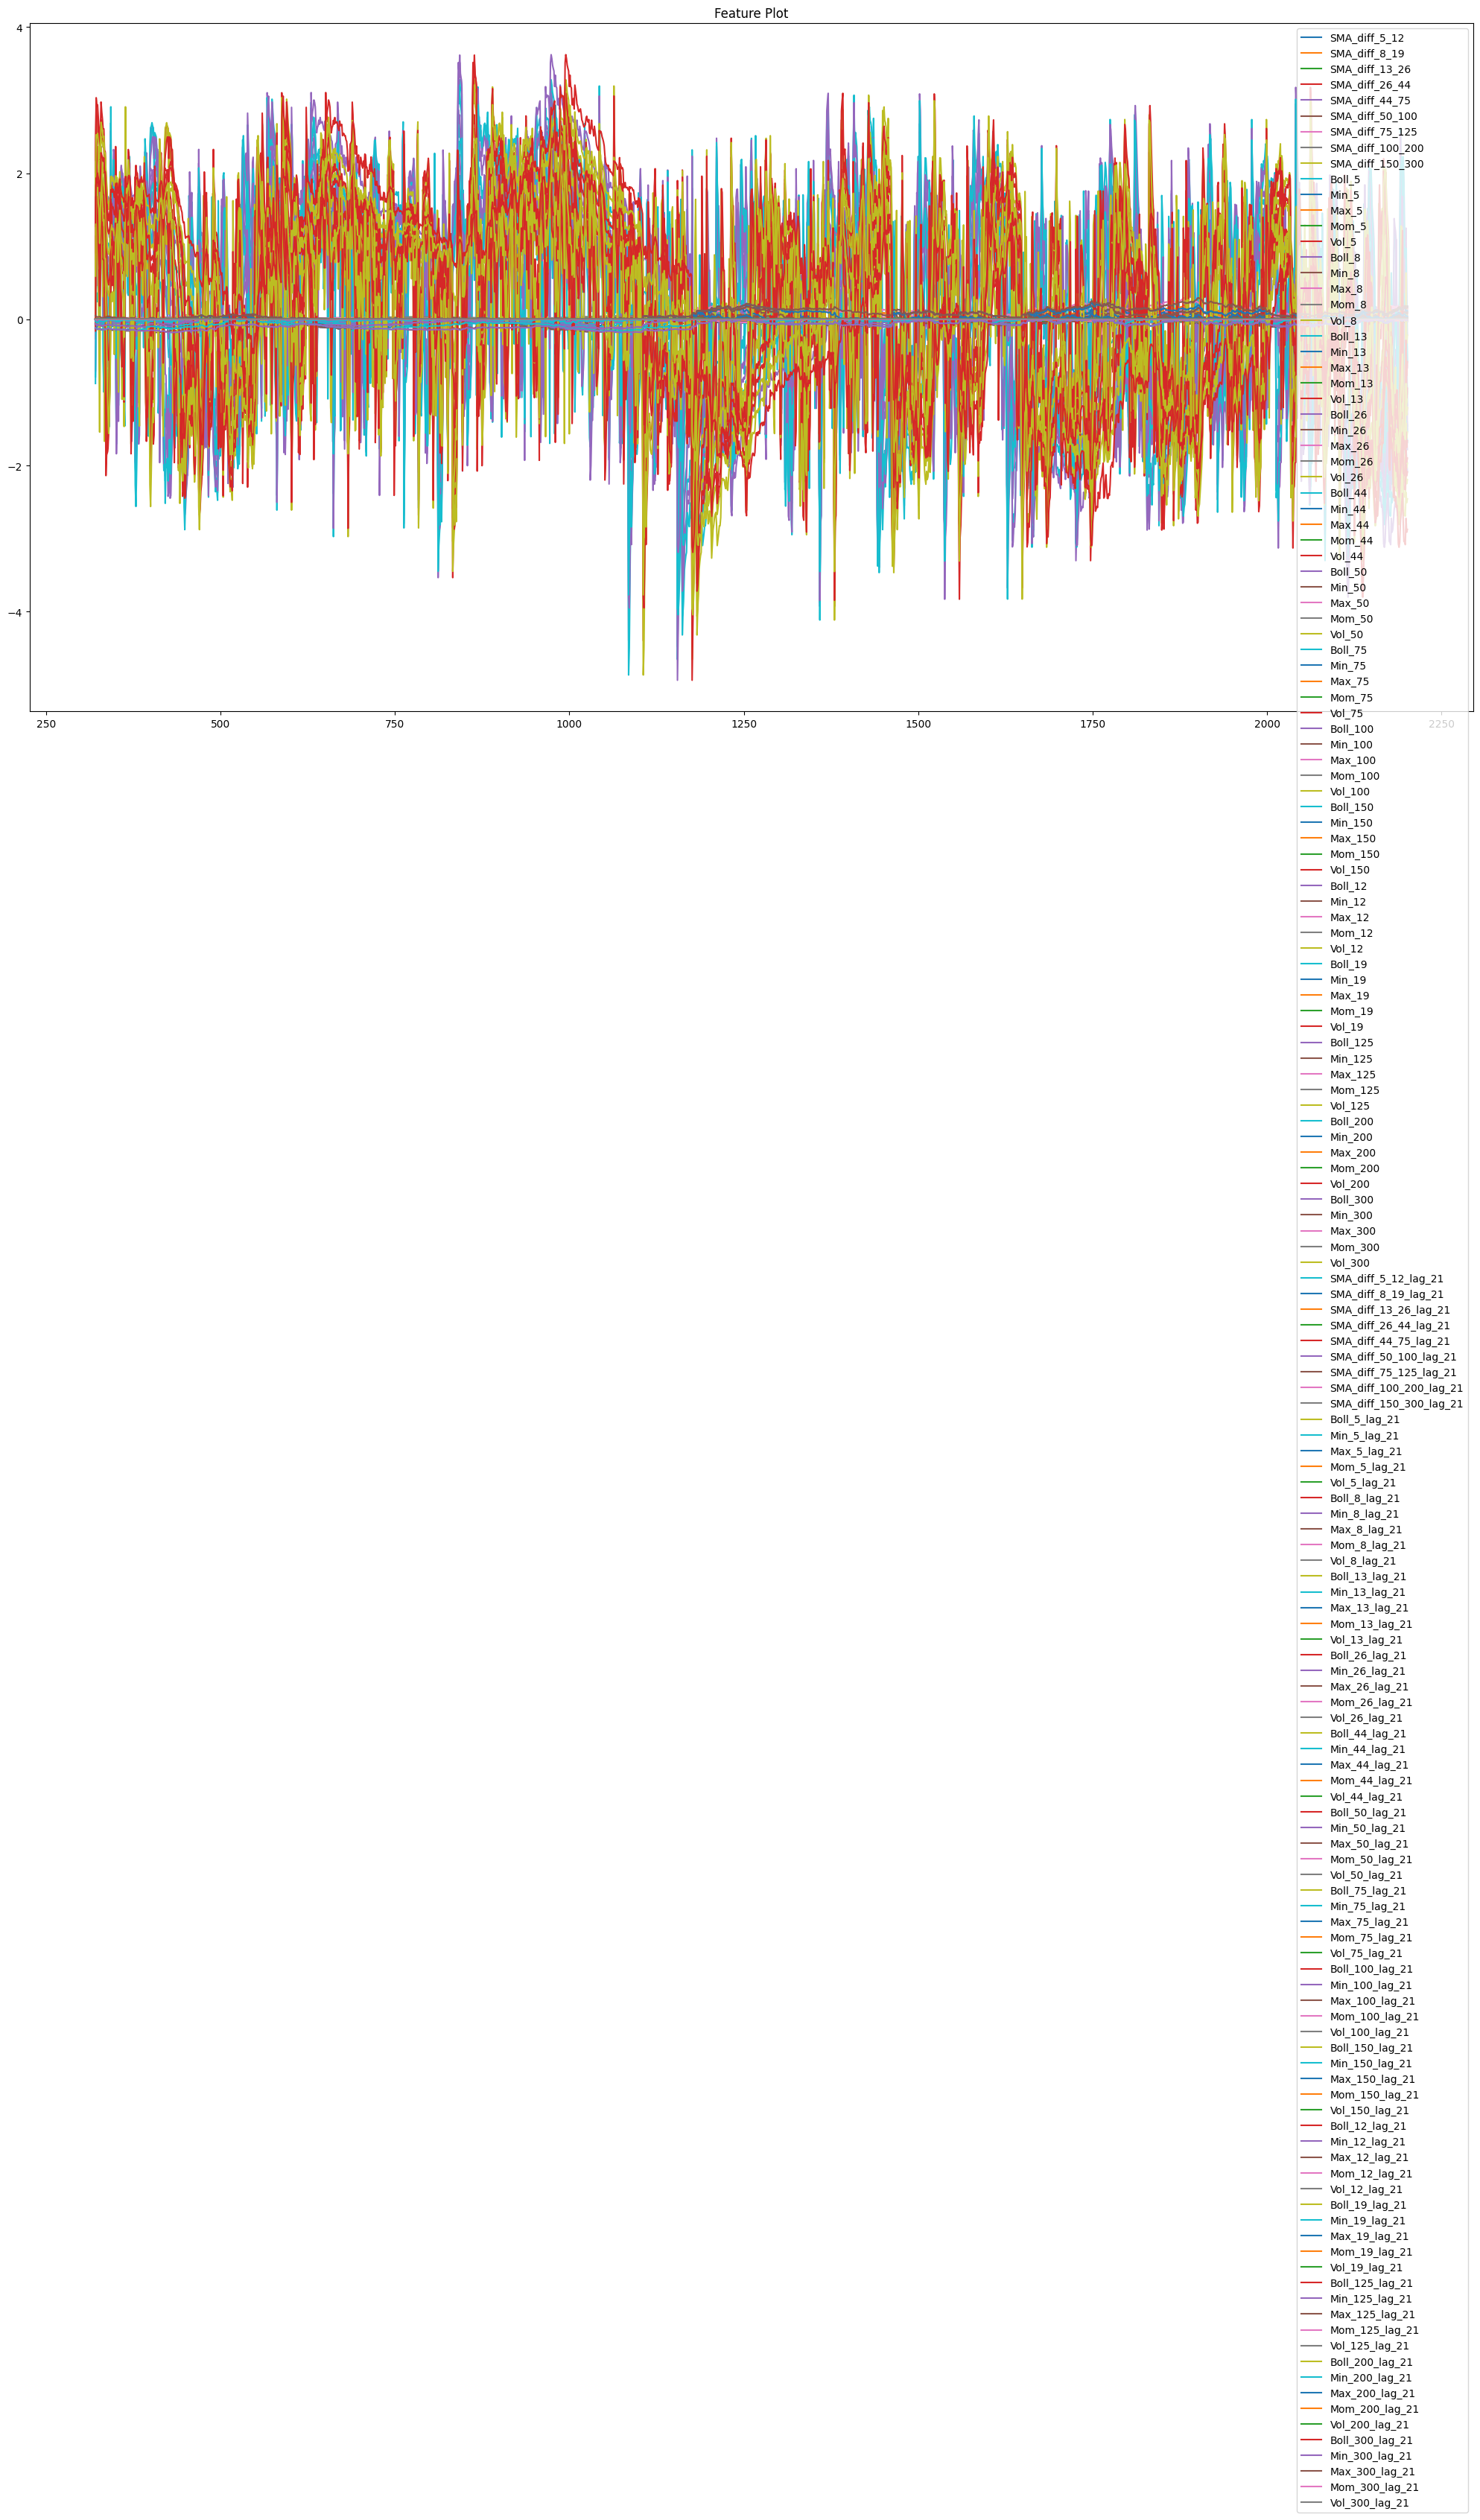

In [13]:
stock_df[stock_df.columns[8:]].plot(title='Feature Plot', figsize=(25, 12))

# Task 3 :Trading Predictive Models

In [14]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,"(0.00162, 0.0513]",increase,-0.006044,-0.003734,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,"(0.00162, 0.0513]",increase,-0.003956,-0.004200,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,"(-0.00142, 0.00162]",no big change,-0.001710,-0.004125,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,"(-0.00142, 0.00162]",no big change,0.000633,-0.003800,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,"(-0.00142, 0.00162]",no big change,0.002563,-0.002985,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease,0.008115,0.008115,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change,0.006579,0.008770,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase,0.005242,0.008034,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease,0.002098,0.007063,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [15]:
stock_df.dropna(inplace=True) 

In [16]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,"(0.00162, 0.0513]",increase,-0.006044,-0.003734,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,"(0.00162, 0.0513]",increase,-0.003956,-0.004200,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,"(-0.00142, 0.00162]",no big change,-0.001710,-0.004125,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,"(-0.00142, 0.00162]",no big change,0.000633,-0.003800,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,"(-0.00142, 0.00162]",no big change,0.002563,-0.002985,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease,0.008115,0.008115,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change,0.006579,0.008770,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase,0.005242,0.008034,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease,0.002098,0.007063,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [17]:
stock_df.Close_pct_change_category = stock_df.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)

In [18]:
stock_df.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease

In [19]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,1,-0.006044,-0.003734,0.002909,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,1,-0.003956,-0.004200,0.001975,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,0,-0.001710,-0.004125,0.000990,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,0,0.000633,-0.003800,0.000073,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,0,0.002563,-0.002985,-0.000966,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0,0.008115,0.008115,0.003147,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0,0.006579,0.008770,0.003880,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,1,0.005242,0.008034,0.005169,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0,0.002098,0.007063,0.006105,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [20]:
Y = stock_df.Close_pct_change_category.to_frame() # Y is labes for big change or small changes

In [21]:
stock_df.drop(columns="Close_pct_change_category",inplace = True)


In [22]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,-0.006044,-0.003734,0.002909,0.007662,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,-0.003956,-0.004200,0.001975,0.007525,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,-0.001710,-0.004125,0.000990,0.007499,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,0.000633,-0.003800,0.000073,0.007415,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,0.002563,-0.002985,-0.000966,0.007383,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [23]:
X= stock_df.copy() # X = are features  from all the indicator  

In [24]:
X.describe()

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,...,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,0.817202,0.819965,0.814281,0.817101,0.264718,-0.000024,-0.000091,-0.000163,-0.000204,-0.000234,...,0.200333,-0.065653,0.060193,0.000056,0.005636,0.215589,-0.082385,0.076728,0.000052,0.005661
std,0.077100,0.077039,0.077181,0.077123,0.166878,0.005998,0.005662,0.007085,0.007111,0.007518,...,1.510250,0.042175,0.058184,0.000417,0.001698,1.494552,0.048990,0.069749,0.000330,0.001558
min,0.654341,0.657125,0.652893,0.654397,0.000000,-0.039071,-0.033518,-0.034185,-0.031128,-0.024970,...,-3.267250,-0.167680,0.000000,-0.000834,0.002775,-3.118503,-0.179422,0.000000,-0.000715,0.002966
25%,0.748343,0.751629,0.745280,0.748343,0.149533,-0.002462,-0.002941,-0.003521,-0.003666,-0.004367,...,-1.063997,-0.094762,0.006963,-0.000270,0.003945,-1.029066,-0.127201,0.008832,-0.000224,0.004169
50%,0.821741,0.823189,0.819235,0.821100,0.216741,0.000167,0.000639,0.000765,0.001028,0.000949,...,0.320555,-0.062852,0.042400,0.000049,0.006018,0.205161,-0.077493,0.061117,0.000063,0.005893
75%,0.870051,0.872974,0.867294,0.870190,0.330952,0.002659,0.003326,0.004146,0.004130,0.004437,...,1.512695,-0.032226,0.104896,0.000394,0.006924,1.512046,-0.045426,0.134139,0.000336,0.007157
max,0.998719,1.000000,0.997132,0.998663,1.449793,0.038453,0.018996,0.018113,0.016433,0.016388,...,3.279834,0.000000,0.225528,0.000926,0.008368,3.623024,0.000000,0.295558,0.000630,0.008263


In [25]:
X.shape # this will say you how many features we have 

(1881, 164)

In [26]:
Y.shape   # Y is all  big increase , incease and no increase


(1881, 1)

In [27]:

# Get the percentage to split the data( 70% data for training set, and 30% data for test set)

percentage_split =0.7;
row= int(stock_df.shape[0]*percentage_split)

#create the train data set
X_train = X[:row]

Y_train = Y[:row]

#create the test data set 
X_test = X[row:]
Y_test = Y[row:]



### **Testing code to check the X and Y**

Testing code for X and Y -- End

**First Data Model Predication -SVC(scalar vector classification) - MODEL-1**

In [28]:
# #Hyperparameter tuning for SVM
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import ParameterSampler, train_test_split

In [29]:
# param_grid = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf'], 'gamma': np.logspace(-3, 3, 7)}

# # Generate 100 different parameter combinations
# param_sampler = ParameterSampler(param_grid, n_iter=100, random_state=42)
# param_combos = list(param_sampler)

# # Loop through the parameter combinations and train SVM models
# for i, params in enumerate(param_combos):
#     svm = SVC(**params)
#     svm.fit(X_train, Y_train)
#     accuracy = svm.score(X_test, Y_test)
#     print("Parameter Combo", i + 1)
#     print("Parameters:", params)
#     print("Test Set Accuracy:", accuracy)
#     print("------------")

# #77% : 'kernel': 'linear', 'gamma': 1000.0, 'C': 1000.0

In [30]:
# imported the libary for the machine learning model which is  support Vector Classifier (SVC)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

params = {'C': [500, 1000, 2000,1000], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [500, 1000, 2000,1000]}

# Now creating model
model = SVC()
grid_search = GridSearchCV(model, params, cv=5)

model.fit(X_train,Y_train)  #training the model on X_train and Y_Train


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
#X_train.describe().iloc[1,:].plot()

In [32]:
model.score(X_train,Y_train) # checking the score the model on train data set

0.8457446808510638

In [33]:
model.score(X_test,Y_test)# checking the score the model on test data set

0.7769911504424779

In [34]:
#stock_df['Prediction_SVC']

In [35]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.844072,0.846077,0.840174,0.843571,0.357736,-0.000890,-0.010507,-0.017233,-0.014580,-0.001153,...,1.423050,-0.080697,0.026734,0.000035,0.006643,1.281205,-0.080697,0.026734,0.000106,0.006300
1638,0.843738,0.845074,0.836721,0.838169,0.234648,-0.006403,-0.011877,-0.017322,-0.016718,-0.002586,...,1.457720,-0.081523,0.025811,0.000016,0.006636,1.310010,-0.081523,0.025811,0.000121,0.006297
1639,0.837835,0.839505,0.833658,0.837222,0.231368,-0.001129,-0.014378,-0.017741,-0.018949,-0.003865,...,1.529134,-0.083313,0.023813,0.000041,0.006633,1.379526,-0.083313,0.023813,0.000160,0.006271
1640,0.837222,0.844295,0.837145,0.844155,0.307166,0.008281,-0.013478,-0.018342,-0.020195,-0.005249,...,1.517016,-0.083029,0.024129,0.000025,0.006630,1.357172,-0.083029,0.024129,0.000172,0.006267
1641,0.844406,0.847692,0.841789,0.842011,0.538745,-0.002540,-0.012126,-0.018915,-0.019757,-0.006528,...,1.327438,-0.078353,0.029351,0.000002,0.006640,1.144832,-0.078353,0.029351,0.000134,0.006264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [36]:
#Now we make and show the models predictins

#showing the prediction
def predictDF(df, model, name):
  data = pd.DataFrame()
  data[name] = model.predict(df)
  return data
  


In [37]:
svc_pred = predictDF(X_test, model, "Prediction_SVC")

In [38]:
svc_pred

,Prediction_SVC
0,0
1,0
2,0
3,1
4,0
...,...
560,0
561,0
562,0
563,0


In [39]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.844072,0.846077,0.840174,0.843571,0.357736,-0.000890,-0.010507,-0.017233,-0.014580,-0.001153,...,1.423050,-0.080697,0.026734,0.000035,0.006643,1.281205,-0.080697,0.026734,0.000106,0.006300
1638,0.843738,0.845074,0.836721,0.838169,0.234648,-0.006403,-0.011877,-0.017322,-0.016718,-0.002586,...,1.457720,-0.081523,0.025811,0.000016,0.006636,1.310010,-0.081523,0.025811,0.000121,0.006297
1639,0.837835,0.839505,0.833658,0.837222,0.231368,-0.001129,-0.014378,-0.017741,-0.018949,-0.003865,...,1.529134,-0.083313,0.023813,0.000041,0.006633,1.379526,-0.083313,0.023813,0.000160,0.006271
1640,0.837222,0.844295,0.837145,0.844155,0.307166,0.008281,-0.013478,-0.018342,-0.020195,-0.005249,...,1.517016,-0.083029,0.024129,0.000025,0.006630,1.357172,-0.083029,0.024129,0.000172,0.006267
1641,0.844406,0.847692,0.841789,0.842011,0.538745,-0.002540,-0.012126,-0.018915,-0.019757,-0.006528,...,1.327438,-0.078353,0.029351,0.000002,0.006640,1.144832,-0.078353,0.029351,0.000134,0.006264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [40]:
def graphReturns(df, data, name):
  from pandas.io.formats.style import plt
  from ast import Return
  stock_df = df.copy()
  dat = data.copy()
  stock_df = pd.concat([stock_df,dat],axis=1,ignore_index=True,sort=False)
  print(stock_df)
  stock_df['Return'] =stock_df['Close'].pct_change(1)
  stock_df['Strat_Return'] = stock_df[name].shift(1)*stock_df['Return']
  stock_df['Strat_Return']  # this will shows the stratergy returns from SVC

  # calculate the cumlative returns
  stock_df['Cummulative_Return'] = stock_df['Return'].cumsum()
  # strategy cummlative return
  stock_df['Cummulative_Strat'] = stock_df['Strat_Return'].cumsum()
  stock_df['Cummulative_Strat']

  # Grpah to check our first stratergy
  plt.figure(figsize=(16,8))
  plt.title('Returns')
  plt.plot(stock_df['Cummulative_Return'],color = 'orange',label = 'Stock return')
  plt.plot(stock_df['Cummulative_Strat'],color = 'Red',label = 'Stratergy return')
  plt.xticks(rotation =45)
  plt.legend()
  plt.show()


In [41]:
#graphReturns(X_test, svc_pred,"Prediction_SVC")

**Second Data Model Predication -(Random Forest_Regression )  MODEL-2**

In [42]:
#creating a second model 
from sklearn.ensemble import RandomForestClassifier
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train,Y_train)





<ipython-input-42-d9aa80432684>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train,Y_train)


RandomForestClassifier()

In [43]:
model_RFR.score(X_train,Y_train) # Random

1.0

In [44]:
model_RFR.score(X_test,Y_test)

0.9964601769911504

In [45]:
#Now we make and show the models predictins
#stock_df['Prediction_RFR'] = model.predict(X)
rfr_pred = predictDF(X_test, model_RFR, "Prediction_RFR")

In [46]:
rfr_pred.sum()

Prediction_RFR    213
dtype: int64

In [47]:
#sum(stock_df['Prediction_RFR'])

### **Third Model -- Logistic Regression MODEL- 3**


In [48]:
#creating a second model 
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model_LR.score(X_train,Y_train) # logisticRegresssion  on train data


0.8275075987841946

In [50]:
model_LR.score(X_test,Y_test) # logistic Regression on test data

0.7858407079646018

In [51]:
lr_pred = predictDF(X_test, model_LR, "Prediction_LR")

In [52]:
sum(lr_pred['Prediction_LR'])

228

### **Forth model for predcition which is DescionTreeRegressor MODEL-4**

In [53]:
#creating the froth model for prediction
from sklearn.tree import DecisionTreeClassifier
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train,Y_train)



DecisionTreeClassifier()

In [54]:
model_DTR.score(X_train,Y_train) # logisticRegresssion  on train data

1.0

In [55]:
model_DTR.score(X_test,Y_test) # logisticRegresssion  on train data

0.9982300884955753

In [56]:
dtr_pred = predictDF(X_test, model_DTR, "Prediction_DTR")

In [57]:
sum(dtr_pred['Prediction_DTR'])

214

### **fith model for Prediction which is DNN MODEL-5**

In [58]:
from pandas.core.algorithms import mode
#creating the fifth model for prediction

from sklearn.neural_network import MLPClassifier
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

model_DNN.fit(X_train,Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [59]:
model_DNN.score(X_train,Y_train)#DNN ON Train data


0.8487841945288754

In [60]:
model_DNN.score(X_test,Y_test) # DNN on the test data

0.8035398230088495

In [61]:
dnn_pred = predictDF(X_test, model_DNN, "Prediction_DNN")
sum(dnn_pred['Prediction_DNN'])

214

### **SIX model for predicition  K-NNN  MODEL-6**


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [63]:
knn.score(X_train,Y_train)

0.8054711246200608

In [64]:
knn.score(X_test,Y_test)

0.7150442477876107

In [65]:
knn_pred = predictDF(X_test, knn, "Prediction_KNN")
sum(knn_pred['Prediction_KNN'])

156

### **Seventh Modelf ro predicition GaussianNB MODEL-7**


In [66]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate sample data for demonstration purposes
# Create a Gaussian Naive Bayes classifier object
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train, Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [67]:
classifier.score(X_train,Y_train)

0.7173252279635258

In [68]:
classifier.score(X_test,Y_test)

0.6884955752212389

In [69]:
class_pred = predictDF(X_test, classifier, "Prediction_Classifier")
sum(class_pred['Prediction_Classifier'])

323

### **Eight Model for predicition XGBOOST MODEL-8**

In [70]:
import numpy as np
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Generate sample data for demonstration purposes
# Split the data into training and test sets


# Create an XGBoost classifier object
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, Y_train)

# Fit the classifier to the train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
classifier_XGB.score(X_train,Y_train)

1.0

In [72]:
classifier_XGB.score(X_test,Y_test)

0.9982300884955753

In [73]:
XGB_pred = predictDF(X_test, classifier_XGB, "Prediction_XGB")
sum(XGB_pred['Prediction_XGB'])

214

### **Nineth Model fro predicition ADABoostClassifier -9**

In [74]:
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [75]:
clf_ADA.score(X_train,Y_train)

1.0

In [76]:
clf_ADA.score(X_test,Y_test)

0.9982300884955753

In [77]:
ADA_pred = predictDF(X_test, clf_ADA, "Prediction_ADA")
sum(ADA_pred['Prediction_ADA'])

214

### **Tenth Model for predicition  MODEL-10**

In [78]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Train the Gradient Boosting model
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model_GD.fit(X_train, Y_train)

# Evaluate the model on the test set



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [79]:
model_GD.score(X_train,Y_train)

1.0

In [80]:
model_GD.score(X_test,Y_test)

0.9982300884955753

In [81]:
GD_pred = predictDF(X_test, model_GD, "Prediction_GD")
sum(GD_pred['Prediction_GD'])

214

### **From here we are finding the  classification and recall prscsion (3.2 and 3.3) each  10 model for the task 3**

### **Recall and Prescsion from confusing matrxi -- for Model GD Model -10**

In [82]:
from sklearn.metrics import confusion_matrix
Label1_For_GD = confusion_matrix(Y_test, model_GD.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _GD.predict
TP_GD = Label1_For_GD[0,0]
FP_GD = Label1_For_GD[0,1]
TN_GD = Label1_For_GD[1,1]
FN_GD = Label1_For_GD[1,0]
precision_GD = TP_GD/(TP_GD+FP_GD)
RECALL_GD = TP_GD/(TP_GD+FN_GD)

print("Precision for GD_model: ",precision_GD)
print("Recall for GD_model : ", RECALL_GD)
print("Confusion Matrix: \n", Label1_For_GD)



Precision for GD_model:  1.0
Recall for GD_model :  0.9971509971509972
Confusion Matrix: 
 [[350   0]
 [  1 214]]


In [83]:
#X_test

In [84]:
#X_train

### **Recall and Prescsion from confusing matrxi -- for Model ADA - Model -9**

In [85]:
Label1_For_ADA = confusion_matrix(Y_test, clf_ADA.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_ADA = Label1_For_ADA[0,0]
FP_ADA = Label1_For_ADA[0,1]
TN_ADA = Label1_For_ADA[1,1]
FN_ADA = Label1_For_ADA[1,0]
precision_ADA = TP_ADA/(TP_ADA+FP_ADA)
RECALL_ADA = TP_ADA/(TP_ADA+FN_ADA)

print("Precision for ADD_model: ",precision_ADA)
print("Recall for ADA_model : ", RECALL_ADA)
print("Confusion Matrix: \n", Label1_For_ADA)

Precision for ADD_model:  1.0
Recall for ADA_model :  0.9971509971509972
Confusion Matrix: 
 [[350   0]
 [  1 214]]


### **Recall and Prescsion from confusing matrxi -- for Model XGB - Model 8**

In [86]:
Label1_For_XGB = confusion_matrix(Y_test, classifier_XGB.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_XGB = Label1_For_XGB[0,0]
FP_XGB = Label1_For_XGB[0,1]
TN_XGB = Label1_For_XGB[1,1]
FN_XGB = Label1_For_XGB[1,0]
precision_XGB = TP_XGB/(TP_XGB+FP_XGB)
RECALL_XGB = TP_XGB/(TP_XGB+FN_XGB)

print("Precision for XGB_model: ",precision_XGB)
print("Recall for XGB_model : ", RECALL_XGB)
print("Confusion Matrix: \n", Label1_For_XGB)

Precision for XGB_model:  1.0
Recall for XGB_model :  0.9971509971509972
Confusion Matrix: 
 [[350   0]
 [  1 214]]


### **Recall and Prescsion from confusing matriX -- for Model GaussianNB- Model 7**

In [87]:
Label1_For_GNB = confusion_matrix(Y_test, classifier.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_GNB = Label1_For_GNB[0,0]
FP_GNB = Label1_For_GNB[0,1]
TN_GNB = Label1_For_GNB[1,1]
FN_GNB = Label1_For_GNB[1,0]
precision_GNB = TP_GNB/(TP_GNB+FP_GNB)
RECALL_GNB = TP_GNB/(TP_GNB+FN_GNB)

print("Precision for GNB_model: ",precision_GNB)
print("Recall for GNB_model : ", RECALL_GNB)
print("Confusion Matrix: \n", Label1_For_GNB)

Precision for GNB_model:  0.5942857142857143
Recall for GNB_model :  0.859504132231405
Confusion Matrix: 
 [[208 142]
 [ 34 181]]


### **Recall and Prescsion from confusing matriX -- for Model KNN- Model 6**

In [88]:
Label1_For_KNN = confusion_matrix(Y_test, knn.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_KNN = Label1_For_KNN[0,0]
FP_KNN = Label1_For_KNN[0,1]
TN_KNN = Label1_For_KNN[1,1]
FN_KNN = Label1_For_KNN[1,0]
precision_KNN = TP_KNN/(TP_KNN+FP_KNN)
RECALL_KNN = TP_KNN/(TP_KNN+FN_KNN)

print("Precision for KNN_model: ",precision_KNN)
print("Recall for KNN_model : ", RECALL_KNN)
print("Confusion Matrix: \n", Label1_For_KNN)

Precision for KNN_model:  0.8542857142857143
Recall for KNN_model :  0.7310513447432763
Confusion Matrix: 
 [[299  51]
 [110 105]]


### **Recall and Prescsion from confusing matriX -- for Model DNN- Model 5**

In [89]:
Label1_For_DNN = confusion_matrix(Y_test, model_DNN.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DNN = Label1_For_DNN[0,0]
FP_DNN = Label1_For_DNN[0,1]
TN_DNN = Label1_For_DNN[1,1]
FN_DNN = Label1_For_DNN[1,0]
precision_DNN = TP_DNN/(TP_DNN+FP_DNN)
RECALL_DNN = TP_DNN/(TP_DNN+FN_DNN)

print("Precision for DNN_model: ",precision_DNN)
print("Recall for DNN_model : ", RECALL_DNN)
print("Confusion Matrix: \n", Label1_For_DNN)

Precision for DNN_model:  0.8428571428571429
Recall for DNN_model :  0.8404558404558404
Confusion Matrix: 
 [[295  55]
 [ 56 159]]


In [90]:
X.shape

(1881, 164)

### **Recall and Prescsion from confusing matriX -- for Model DTR- Model 4**

In [91]:
Label1_For_DTR = confusion_matrix(Y_test, model_DTR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DTR = Label1_For_DTR[0,0]
FP_DTR = Label1_For_DTR[0,1]
TN_DTR = Label1_For_DTR[1,1]
FN_DTR = Label1_For_DTR[1,0]
precision_DTR = TP_DTR/(TP_DTR+FP_DTR)
RECALL_DTR= TP_DTR/(TP_DTR+FN_DTR)

print("Precision for DTR_model: ",precision_DTR)
print("Recall for DTR_model : ", RECALL_DTR)
print("Confusion Matrix: \n", Label1_For_DTR)

Precision for DTR_model:  1.0
Recall for DTR_model :  0.9971509971509972
Confusion Matrix: 
 [[350   0]
 [  1 214]]


### **Recall and Prescsion from confusing matriX -- for Model LR- Model 3**

In [92]:
Label1_For_LR = confusion_matrix(Y_test, model_LR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_LR = Label1_For_LR[0,0]
FP_LR = Label1_For_LR[0,1]
TN_LR = Label1_For_LR[1,1]
FN_LR = Label1_For_LR[1,0]
precision_LR = TP_LR/(TP_LR+FP_LR)
RECALL_LR= TP_LR/(TP_LR+FN_LR)

print("Precision for LR_model: ",precision_LR)
print("Recall for LR_model : ", RECALL_LR)
print("Confusion Matrix: \n", Label1_For_LR)

Precision for LR_model:  0.8085714285714286
Recall for LR_model :  0.8397626112759644
Confusion Matrix: 
 [[283  67]
 [ 54 161]]


### **Recall and Prescsion from confusing matriX -- for Model RFR- Model 2**

In [93]:
Label1_For_RFR = confusion_matrix(Y_test, model_RFR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_RFR = Label1_For_RFR[0,0]
FP_RFR = Label1_For_RFR[0,1]
TN_RFR = Label1_For_RFR[1,1]
FN_RFR = Label1_For_RFR[1,0]
precision_RFR = TP_RFR/(TP_RFR+FP_RFR)
RECALL_RFR= TP_RFR/(TP_RFR+FN_RFR)

print("Precision for RFR_model: ",precision_RFR)
print("Recall for RFR_model : ", RECALL_RFR)
print("Confusion Matrix: \n", Label1_For_RFR)

Precision for RFR_model:  1.0
Recall for RFR_model :  0.9943181818181818
Confusion Matrix: 
 [[350   0]
 [  2 213]]


### **Recall and Prescsion from confusing matriX -- for Model SVC- Model 1**

In [94]:
Label1_For_SVC = confusion_matrix(Y_test, model.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_SVC = Label1_For_SVC[0,0]
FP_SVC = Label1_For_SVC[0,1]
TN_SVC = Label1_For_SVC[1,1]
FN_SVC = Label1_For_SVC[1,0]
precision_SVC = TP_SVC/(TP_SVC+FP_SVC)
RECALL_SVC= TP_SVC/(TP_SVC+FN_SVC)

print("Precision for SVC_model: ",precision_SVC)
print("Recall for SVC_model : ", RECALL_SVC)
print("Confusion Matrix: \n", Label1_For_SVC)

Precision for SVC_model:  0.8485714285714285
Recall for SVC_model :  0.8027027027027027
Confusion Matrix: 
 [[297  53]
 [ 73 142]]


### **Task 4 and 5**

### **Task <4  and 5 > ---- start from here, With Using PCA(Principal Component Analysis) and repeating task 3 again for all the 10 model and spilt**

In [95]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

"""scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled"""

'scaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\nX_scaled'

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98) ## We used 0.95 to restore 95 % of intformation


X_pca = pca.fit_transform(X)
#shape ## This gave us that out of 95 features 3 features are that which will be important for us to selection  from X 

In [97]:
components = pca.components_


In [98]:
components.shape

(9, 164)

Again Spliting the  data set  with THE PCA(Principal Component Analysis)

In [99]:
# Get the percentage to split the data( 80% data for training set, and 10% data for test set)

percentage_split =0.8;
row= int(X_pca.shape[0]*percentage_split)

#create the train data set
X_train_pca = X_pca[:row]

Y_train_pca = Y[:row]

#create the test data set 
X_test_pca = X_pca[row:]
Y_test_pca = Y[row:]

Now using the above Split _pca data set to  train all the model again in the dats set and see which one is best

### **Model set for GD  for n = 91 with PCA_Spilt - for model 10**

In [100]:
from sklearn.metrics import precision_score
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)  # MODEL fit !!!!!!! for model_GD
model_GD.fit(X_train_pca, Y_train_pca)

  
confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))   ## Confusion matrix  for classfication precision  for Model _GD.predict
GD = confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))


print("score: " +str(model_GD.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_GD.predict(X_test_pca))))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.7718832891246684
precision: 0.8350515463917526


In [101]:
print(GD)

[[210  16]
 [ 70  81]]


### **Model set for CLF_ADA(AdaaBoost) for n = 91 with PCA_Spilt - for model 9**

In [102]:
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
ada = confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
clf_ADA.score(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8477393617021277

In [103]:
print("score: " +str(clf_ADA.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, clf_ADA.predict(X_test_pca))))

score: 0.7559681697612732
precision: 0.7092198581560284


### **Model set for XGB_BOOST for n =  with PCA_Spilt- for model 8**

In [104]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
xgb =confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
classifier_XGB.score(X_train_pca,Y_train_pca)



1.0

In [105]:
print("score: " +str(classifier_XGB.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier_XGB.predict(X_test_pca))))

score: 0.7718832891246684
precision: 0.7559055118110236


### **Model set for GaussianNB for n = 66 with PCA_Spilt- for model 7**

In [106]:
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
gnb = confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
classifier.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8204787234042553

In [107]:
print("score: " +str(classifier.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier.predict(X_test_pca))))

score: 0.7798408488063661
precision: 0.7741935483870968


### **Model set for KNN for n = 66 with PCA_Spilt- for model 6**

In [108]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn_Value = confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8105053191489362

In [109]:
print("score: " +str(knn.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, knn.predict(X_test_pca))))

score: 0.7427055702917772
precision: 0.75


### **Model set for DNN for n = 66 with PCA_Spilt- for model 5**

In [110]:
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_DNN.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
dnn = confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
model_DNN.score(X_train_pca,Y_train_pca)




/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8251329787234043

In [111]:
print("score: " +str(model_DNN.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DNN.predict(X_test_pca))))

score: 0.7745358090185677
precision: 0.8055555555555556


### **Model set for DTR for n = 66 with PCA_Spilt- for model 4**

In [112]:
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
dtr = confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
model_DTR.score(X_train_pca,Y_train_pca)



1.0

In [113]:
print("score: " +str(model_DTR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DTR.predict(X_test_pca))))

score: 0.7188328912466844
precision: 0.6829268292682927


### **Model set for LR(lOGISTIC REGRESSION) for n = 66 with PCA_Spilt- for model 3**

In [114]:
model_LR = LogisticRegression()
model_LR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))

lr = confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))
model_LR.score(X_train_pca,Y_train_pca)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8025265957446809

In [115]:
print("score: " +str(model_LR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_LR.predict(X_test_pca))))

score: 0.7798408488063661
precision: 0.753731343283582


### **Model set for RFR(Random_Forest_classifier) for n = 66 with PCA_Spilt- for model 2**

In [116]:
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))

rfr =confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))
model_RFR.score(X_train_pca,Y_train_pca)

<ipython-input-116-aae855e4513a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train_pca,Y_train_pca)


1.0

In [117]:
print("score: " +str(model_RFR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_RFR.predict(X_test_pca))))

score: 0.8037135278514589
precision: 0.8235294117647058


### **Model set for SCV(Support Vector Classifier) for n = 66 with PCA_Spilt- for model 1**

In [118]:
model = SVC()
model.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model.predict(X_test_pca))
svc_val = confusion_matrix(Y_test_pca, model.predict(X_test_pca))
model.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.839095744680851

In [119]:
print("score: " +str(model.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model.predict(X_test_pca))))

score: 0.76657824933687
precision: 0.7480314960629921


### **TEST 6 (FINAL-TASK - WE CHOSE Model_GD (Gradient Boosting) Model which gave us best Precision = 0.835**

In [120]:
#print(model_GD)

In [121]:
object_test = open(r'/content/drive/MyDrive/CS435/datasets/testing_set1 (1).pkl', "rb")
df_test = pickle.load(object_test)
stock_df_test = df_test[0] #taking the first table in the array as of now.
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = addTI(stock_df_test,lag=21)
stock_df_test.dropna(inplace=True)

<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [122]:
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)


In [123]:
stock_df_test.dropna(inplace=True)

In [124]:
stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X = stock_df_test.copy() # X = are features  from all the indicator  

In [125]:
X

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
322,0.811812,0.825168,0.811812,0.825168,0.366991,-0.001462,0.004749,0.006460,0.008197,0.007652,...,-0.491353,-0.051263,0.098653,-0.000123,0.008253,-0.431089,-0.051263,0.098653,0.000050,0.009190
323,0.825201,0.826913,0.820268,0.823474,0.199445,-0.002053,0.004121,0.005673,0.007958,0.007998,...,-0.530884,-0.049422,0.100784,-0.000155,0.008247,-0.479357,-0.049422,0.100784,0.000025,0.009185
324,0.823591,0.824430,0.820067,0.820067,0.126416,-0.004137,0.002871,0.004903,0.007718,0.008235,...,-0.392361,-0.055001,0.094324,-0.000153,0.008249,-0.331853,-0.055001,0.094324,0.000075,0.009176
325,0.820336,0.821141,0.817181,0.820034,0.139321,-0.000041,0.001747,0.004705,0.007275,0.008304,...,-0.392811,-0.054763,0.094599,-0.000210,0.008210,-0.340086,-0.054763,0.094599,0.000104,0.009161
326,0.819966,0.823725,0.818993,0.822919,0.141527,0.003519,0.000259,0.004163,0.006750,0.008350,...,-0.313135,-0.057845,0.091031,-0.000184,0.008213,-0.257882,-0.057845,0.091031,0.000064,0.009119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.926443,0.932416,0.926443,0.926711,0.121019,-0.000217,0.004352,0.005013,0.001732,0.016309,...,3.074750,-0.130070,0.000000,0.000254,0.007657,2.371276,-0.130070,0.006401,0.000135,0.007113
885,0.926577,0.928725,0.925638,0.928725,0.135454,0.002173,0.002789,0.005144,0.001696,0.015707,...,2.691652,-0.122051,0.009218,0.000198,0.007685,2.059751,-0.122051,0.015678,0.000093,0.007130
886,0.928188,0.928658,0.923893,0.925201,0.139252,-0.003794,0.000790,0.004964,0.001369,0.014994,...,2.698334,-0.123610,0.007427,0.000322,0.007508,2.107869,-0.123610,0.013875,0.000088,0.007129
887,0.925369,0.930134,0.923859,0.928524,0.188126,0.003591,-0.000165,0.004776,0.001966,0.013787,...,2.696926,-0.125036,0.005787,0.000347,0.007504,2.152119,-0.125036,0.012225,0.000079,0.007125


In [126]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=0.98) ## We used 0.95 to restore 95 % of intformation
X_pca = pca.transform(X)

percentage_split =0.8;
row= int(X_pca.shape[0]*percentage_split)

#create the train data set
X_train_pca = X_pca[:row]

Y_train_pca = Y[:row]

#create the test data set 
X_test_pca = X_pca[row:]
Y_test_pca = Y[row:]

#confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))   # I am putting classifier_XGB insted of clf_ADA------------------ to check

gdb_confusion = confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))

print("score: " +str(model_GD.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_GD.predict(X_test_pca))))

score: 0.7631578947368421
precision: 0.8
